In [1]:
import time

# from mimas.file_io import spec_file
import numpy as np
import pandas as pd
# from alphapept import feature_finding
from alphapept.constants import averagine_aa, isotopes
from mimas.external.features_by_alphapept.load_mzml_data import load_mzml_data
# from mimas.external.features_by_alphapept.ms_spectrum import MSSpectrum
# from mimas.helper.arguments import Arguments
# from mimas.spectra.similarity.tools import clean_spectrum
# from mimas.spectra.similarity.tools/
# from mimas.tools.spectral_file.extract_ms1_feature import find_features
from mimas.tools.spectral_file.extract_ms1_feature import process_mzml_file, extract_ms2_spectra
# from mimas.file_io import spec_file
%load_ext autoreload
%autoreload 2
import toolsets.search as search
import toolsets.spectra_operations as so


Compile the cython code is highly recommended!


In [62]:
# mzml_file = "/Users/fanzhoukong/Documents/GitHub/Libgen_data/EAD/mzml/BACSMLS 1.mzML"
# mzml_file ="/Users/fanzhoukong/Documents/GitHub/Libgen_data/casmi/mzml/A_M3_negPFP_03.mzml"

In [227]:
ms2df= process_mzml_file(mzml_file, ifSciex=False)

In [228]:
ms2df

,scan_number,precursor_mz,charge,ms1_intensity_ratio,retention_time,peaks,ms1_index,query_idx
0,238,293.123856,-1,0.969618,0.540066,"[[61.048378, 0.10726301], [87.92364, 0.1445572...",237,0
1,460,197.080885,-1,0.990194,1.029794,"[[51.072353, 0.009219986], [53.002163, 0.01175...",450,9
2,465,243.086620,-1,0.956398,1.038621,"[[54.126934, 0.022826573], [65.038055, 0.03455...",453,11
3,465,243.086620,-1,0.956398,1.038621,"[[54.126934, 0.022826573], [65.038055, 0.03455...",453,11
4,1085,185.117214,-1,0.977382,2.394052,"[[53.72312, 0.0036466636], [63.656487, 0.00340...",1037,47
5,1173,575.270161,-1,1.000000,2.571720,"[[52.898094, 0.073964685], [56.200596, 0.07922...",1110,62
6,1278,901.239950,-1,0.995077,2.800668,"[[71.00753, 0.013150149], [145.02817, 0.009517...",1207,70
7,1331,575.270240,-1,1.000000,2.888530,"[[59.012444, 0.28170097], [71.01235, 0.0600962...",1231,98
8,1333,529.264315,-1,0.987404,2.891299,"[[58.004665, 0.005138994], [59.01245, 0.339829...",1232,100
9,1351,901.239782,-1,1.000000,2.922067,"[[81.00671, 0.04058004], [86.36419, 0.0381839]...",1242,108


In [233]:
ms2df.iloc[19]['peaks']

array([[6.1984955e+01, 4.3104276e-02],
       [8.8358253e+01, 4.4019349e-02],
       [9.6316078e+01, 4.6266716e-02],
       [1.3705995e+02, 4.6230551e-02],
       [1.3981708e+02, 4.9609471e-02],
       [2.0382788e+02, 4.8480310e-02],
       [2.1913779e+02, 5.7808656e-01],
       [2.2108090e+02, 5.8885422e-02],
       [2.2133640e+02, 8.5317440e-02]], dtype=float32)

In [208]:
features_mapped = process_mzml_file(mzml_file, ifSciex=False, ifdebug=True)

In [211]:
ms2_selected =extract_ms2_spectra(load_mzml_data(mzml_file), features_mapped)

In [213]:
features_mapped_selected_sorted['ms1_idx']

115     237
27      450
38      453
48      453
6      1037
510    1110
566    1207
503    1231
470    1232
551    1242
407    1466
442    1489
397    1490
378    1491
359    1557
475    2028
79     2113
516    2187
487    2191
74     2231
446    2249
433    2273
537    2287
Name: ms1_idx, dtype: int64

In [214]:
ms2_df = pd.DataFrame.from_dict(ms2_selected)

In [215]:
ms2_df

,scan_number,precursor_mz,charge,ms1_intensity_ratio,retention_time,peaks
0,238,293.123856,-1,0.969617,0.540066,"[[61.048378, 0.10726301], [87.92364, 0.1445572..."
1,460,197.080885,-1,0.990193,1.029794,"[[51.072353, 0.009219986], [53.002163, 0.01175..."
2,465,243.086620,-1,0.956397,1.038621,"[[54.126934, 0.022826573], [65.038055, 0.03455..."
3,465,243.086620,-1,0.956397,1.038621,"[[54.126934, 0.022826573], [65.038055, 0.03455..."
4,1085,185.117214,-1,0.977381,2.394052,"[[53.72312, 0.0036466636], [63.656487, 0.00340..."
5,1173,575.270161,-1,1.000000,2.571720,"[[52.898094, 0.073964685], [56.200596, 0.07922..."
6,1278,901.239950,-1,0.995077,2.800668,"[[71.00753, 0.013150149], [145.02817, 0.009517..."
7,1331,575.270240,-1,1.000000,2.888530,"[[59.012444, 0.28170097], [71.01235, 0.0600962..."
8,1333,529.264315,-1,0.987403,2.891299,"[[58.004665, 0.005138994], [59.01245, 0.339829..."
9,1351,901.239782,-1,1.000000,2.922067,"[[81.00671, 0.04058004], [86.36419, 0.0381839]..."


In [200]:
so.entropy_similarity_default(ms2df.iloc[2]['peaks'], ms2df.iloc[3]['peaks'], ifNIST=True)

1.0

In [223]:
features_mapped_selected.sort_values(by="query_idx", ascending=True, inplace=True,ignore_index=True )

In [224]:
features_mapped_selected

,rt,mz,charge,mz_matched,query_idx,feature_idx,n_isotopes,int_sum,int_apex,rt_start,rt_apex,rt_end,scan_number,rt_offset,ms1_idx
0,0.540066,293.123856,-1.0,293.123684,0,49.0,4.0,3.185037e+08,2.604713e+07,0.462098,0.485730,0.547763,238,0.054336,237
1,1.029794,197.080885,-1.0,197.080888,9,349.0,2.0,5.872560e+07,3.080959e+06,0.969436,1.013511,1.096153,460,0.016283,450
2,1.038621,243.086620,-1.0,243.072046,11,10.0,2.0,8.652044e+06,2.004301e+05,0.981798,1.017862,1.076967,465,0.020759,453
3,1.038621,243.086620,-1.0,243.086654,11,9.0,3.0,2.691171e+08,2.777882e+07,0.969068,1.018452,1.095271,465,0.020170,453
4,2.394052,185.117214,-1.0,185.117221,47,145.0,3.0,1.073909e+08,5.626948e+06,2.306116,2.397145,2.470669,1085,0.003093,1037
5,2.571720,575.270161,-1.0,575.270274,62,407.0,2.0,3.334297e+07,7.456169e+05,2.492716,2.568866,2.657413,1173,0.002854,1110
6,2.800668,901.239950,-1.0,901.240076,70,28.0,5.0,4.464346e+08,1.857238e+07,2.763218,2.799048,2.862177,1278,0.001621,1207
7,2.888530,575.270240,-1.0,575.270134,98,61.0,4.0,1.476213e+08,8.163773e+06,2.826197,2.892673,2.966147,1331,0.004143,1231
8,2.891299,529.264315,-1.0,529.264461,100,30.0,4.0,2.498112e+08,1.847013e+07,2.823975,2.890438,2.967127,1333,0.000861,1232
9,2.922067,901.239782,-1.0,901.240040,108,169.0,3.0,2.422610e+07,6.407072e+05,2.898216,2.922430,3.052148,1351,0.000362,1242


In [222]:
ms2df

,scan_number,precursor_mz,charge,ms1_intensity_ratio,retention_time,peaks,ms1_index
0,238,293.123856,-1,0.969618,0.540066,"[[61.048378, 0.10726301], [87.92364, 0.1445572...",NaN
1,460,197.080885,-1,0.990194,1.029794,"[[51.072353, 0.009219986], [53.002163, 0.01175...",NaN
2,465,243.086620,-1,0.956398,1.038621,"[[54.126934, 0.022826573], [65.038055, 0.03455...",NaN
3,465,243.086620,-1,0.956398,1.038621,"[[54.126934, 0.022826573], [65.038055, 0.03455...",NaN
4,1085,185.117214,-1,0.977382,2.394052,"[[53.72312, 0.0036466636], [63.656487, 0.00340...",NaN
5,1173,575.270161,-1,1.000000,2.571720,"[[52.898094, 0.073964685], [56.200596, 0.07922...",NaN
6,1278,901.239950,-1,0.995077,2.800668,"[[71.00753, 0.013150149], [145.02817, 0.009517...",1037.0
7,1331,575.270240,-1,1.000000,2.888530,"[[59.012444, 0.28170097], [71.01235, 0.0600962...",NaN
8,1333,529.264315,-1,0.987404,2.891299,"[[58.004665, 0.005138994], [59.01245, 0.339829...",NaN
9,1351,901.239782,-1,1.000000,2.922067,"[[81.00671, 0.04058004], [86.36419, 0.0381839]...",NaN


In [225]:
ms2df['ms1_index']= features_mapped_selected['ms1_idx']

In [226]:
ms2df

,scan_number,precursor_mz,charge,ms1_intensity_ratio,retention_time,peaks,ms1_index
0,238,293.123856,-1,0.969618,0.540066,"[[61.048378, 0.10726301], [87.92364, 0.1445572...",237
1,460,197.080885,-1,0.990194,1.029794,"[[51.072353, 0.009219986], [53.002163, 0.01175...",450
2,465,243.086620,-1,0.956398,1.038621,"[[54.126934, 0.022826573], [65.038055, 0.03455...",453
3,465,243.086620,-1,0.956398,1.038621,"[[54.126934, 0.022826573], [65.038055, 0.03455...",453
4,1085,185.117214,-1,0.977382,2.394052,"[[53.72312, 0.0036466636], [63.656487, 0.00340...",1037
5,1173,575.270161,-1,1.000000,2.571720,"[[52.898094, 0.073964685], [56.200596, 0.07922...",1110
6,1278,901.239950,-1,0.995077,2.800668,"[[71.00753, 0.013150149], [145.02817, 0.009517...",1207
7,1331,575.270240,-1,1.000000,2.888530,"[[59.012444, 0.28170097], [71.01235, 0.0600962...",1231
8,1333,529.264315,-1,0.987404,2.891299,"[[58.004665, 0.005138994], [59.01245, 0.339829...",1232
9,1351,901.239782,-1,1.000000,2.922067,"[[81.00671, 0.04058004], [86.36419, 0.0381839]...",1242


In [216]:
features_mapped_selected.sort_values(by=['query_idx'], ascending=True, inplace=True)

In [217]:
features_mapped_selected

,rt,mz,charge,mz_matched,query_idx,feature_idx,n_isotopes,int_sum,int_apex,rt_start,rt_apex,rt_end,scan_number,rt_offset,ms1_idx
115,0.540066,293.123856,-1.0,293.123684,0,49.0,4.0,3.185037e+08,2.604713e+07,0.462098,0.485730,0.547763,238,0.054336,237
27,1.029794,197.080885,-1.0,197.080888,9,349.0,2.0,5.872560e+07,3.080959e+06,0.969436,1.013511,1.096153,460,0.016283,450
38,1.038621,243.086620,-1.0,243.072046,11,10.0,2.0,8.652044e+06,2.004301e+05,0.981798,1.017862,1.076967,465,0.020759,453
48,1.038621,243.086620,-1.0,243.086654,11,9.0,3.0,2.691171e+08,2.777882e+07,0.969068,1.018452,1.095271,465,0.020170,453
6,2.394052,185.117214,-1.0,185.117221,47,145.0,3.0,1.073909e+08,5.626948e+06,2.306116,2.397145,2.470669,1085,0.003093,1037
510,2.571720,575.270161,-1.0,575.270274,62,407.0,2.0,3.334297e+07,7.456169e+05,2.492716,2.568866,2.657413,1173,0.002854,1110
566,2.800668,901.239950,-1.0,901.240076,70,28.0,5.0,4.464346e+08,1.857238e+07,2.763218,2.799048,2.862177,1278,0.001621,1207
503,2.888530,575.270240,-1.0,575.270134,98,61.0,4.0,1.476213e+08,8.163773e+06,2.826197,2.892673,2.966147,1331,0.004143,1231
470,2.891299,529.264315,-1.0,529.264461,100,30.0,4.0,2.498112e+08,1.847013e+07,2.823975,2.890438,2.967127,1333,0.000861,1232
551,2.922067,901.239782,-1.0,901.240040,108,169.0,3.0,2.422610e+07,6.407072e+05,2.898216,2.922430,3.052148,1351,0.000362,1242


In [204]:
features_mapped_selected_sorted['ms1']

,rt,mz,charge,mz_matched,query_idx,feature_idx,n_isotopes,int_sum,int_apex,rt_start,rt_apex,rt_end,scan_number,rt_offset,ms1_idx
115,0.540066,293.123856,-1.0,293.123684,0,49.0,4.0,3.185037e+08,2.604713e+07,0.462098,0.485730,0.547763,238,0.054336,237
27,1.029794,197.080885,-1.0,197.080888,9,349.0,2.0,5.872560e+07,3.080959e+06,0.969436,1.013511,1.096153,460,0.016283,450
38,1.038621,243.086620,-1.0,243.072046,11,10.0,2.0,8.652044e+06,2.004301e+05,0.981798,1.017862,1.076967,465,0.020759,453
48,1.038621,243.086620,-1.0,243.086654,11,9.0,3.0,2.691171e+08,2.777882e+07,0.969068,1.018452,1.095271,465,0.020170,453
6,2.394052,185.117214,-1.0,185.117221,47,145.0,3.0,1.073909e+08,5.626948e+06,2.306116,2.397145,2.470669,1085,0.003093,1037
510,2.571720,575.270161,-1.0,575.270274,62,407.0,2.0,3.334297e+07,7.456169e+05,2.492716,2.568866,2.657413,1173,0.002854,1110
566,2.800668,901.239950,-1.0,901.240076,70,28.0,5.0,4.464346e+08,1.857238e+07,2.763218,2.799048,2.862177,1278,0.001621,1207
503,2.888530,575.270240,-1.0,575.270134,98,61.0,4.0,1.476213e+08,8.163773e+06,2.826197,2.892673,2.966147,1331,0.004143,1231
470,2.891299,529.264315,-1.0,529.264461,100,30.0,4.0,2.498112e+08,1.847013e+07,2.823975,2.890438,2.967127,1333,0.000861,1232
551,2.922067,901.239782,-1.0,901.240040,108,169.0,3.0,2.422610e+07,6.407072e+05,2.898216,2.922430,3.052148,1351,0.000362,1242


In [189]:
len(features_mapped_selected['feature_idx'].unique())

23

In [190]:
len(features_mapped_selected)

23

In [168]:
ms_file['rt_list_ms1'][1557]

3.7033706

In [173]:
import toolsets.ms2_spectra_plotter as plotter

i am ms2 spectra plotter, and I have been sideloaded successfully
I have 2 functions, head to tail plot and ms2 plot


<module 'matplotlib.pyplot' from '/opt/homebrew/Caskroom/miniforge/base/envs/alphapept_env/lib/python3.8/site-packages/matplotlib/pyplot.py'>

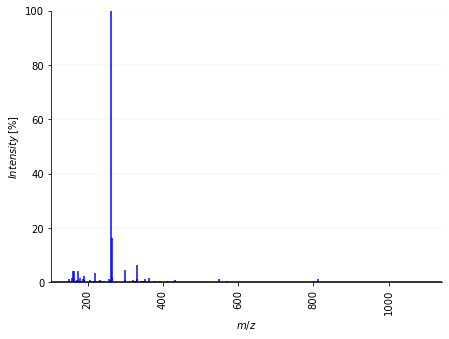

In [184]:
plotter.ms2_plot(so.pack_spectra(mass_list_ms1[2113], int_list_ms1[2113]))

In [186]:
mass_list_ms1[2113][pd.Series(int_list_ms1[2113]).idxmax()]

263.12835693359375

In [183]:
mass_list_ms1[1242][169]

529.2646484375

In [175]:
so.convert_string_to_nist(so.pack_spectra(mass_list_ms1[1557], int_list_ms1[1557]))

array([[1.50981430e+02, 4.61390625e+04],
       [1.52001022e+02, 4.04322406e+05],
       [1.52977173e+02, 5.01647070e+04],
       [1.53054611e+02, 1.84432203e+05],
       [1.57153458e+02, 2.62128145e+04],
       [1.58977249e+02, 5.08505531e+05],
       [1.60840729e+02, 2.91247875e+05],
       [1.60974808e+02, 5.38492891e+04],
       [1.62837799e+02, 2.04366391e+05],
       [1.64834610e+02, 3.42989297e+04],
       [1.64925980e+02, 1.23340289e+05],
       [1.68835159e+02, 3.28015547e+04],
       [1.70832001e+02, 5.59698555e+04],
       [1.70869461e+02, 6.31650547e+04],
       [1.72005859e+02, 3.03255664e+04],
       [1.72643173e+02, 2.97577930e+04],
       [1.72829697e+02, 2.98577480e+04],
       [1.72866852e+02, 3.30556367e+04],
       [1.74950455e+02, 3.67168906e+04],
       [1.74954880e+02, 1.24343088e+06],
       [1.75958176e+02, 5.52373828e+04],
       [1.78976669e+02, 5.46181500e+05],
       [1.80898209e+02, 1.10490180e+05],
       [1.80971939e+02, 1.12502117e+05],
       [1.840062

In [86]:
ms_file = load_mzml_data(mzml_file)

In [89]:
mapped_ms2_idx = set(features_mapped["query_idx"].tolist())

In [93]:
len(features_mapped['query_idx'].unique())

215

In [92]:
len(mapped_ms2_idx)

215

In [94]:
selected_ms2_idx = features_mapped_selected.loc[:, "query_idx"].tolist()

In [96]:
selected_ms2_idx.sort()

In [97]:
idx_to_ms1_intensity_ratio = {int(row["query_idx"]): row["ms1_intensity_ratio"]
                                  for i, row in features_mapped_selected.iterrows()}

In [145]:
ms_file['indices_ms1'][1559]-ms_file['indices_ms1'][1558]

157

In [101]:
ms_file['scan_list_ms2'][0]

238

In [121]:
mass_list, intensity_list = load_mzml_data(mzml_file, nested_array = True, ifSciex = False)

In [134]:
ms_file['mass_list_ms1'][532732:532893]

array([ 150.98143005,  152.00102234,  152.97717285,  153.05461121,
        157.15345764,  158.97724915,  160.84072876,  160.97480774,
        162.83779907,  164.83460999,  164.92597961,  168.8351593 ,
        170.83200073,  170.86946106,  172.00585938,  172.64317322,
        172.82969666,  172.86685181,  174.95045471,  174.95487976,
        175.95817566,  178.97666931,  180.89820862,  180.97193909,
        184.00627136,  187.85975647,  187.92771912,  188.86553955,
        188.93185425,  189.85684204,  190.92729187,  205.83866882,
        206.16358948,  206.97187805,  207.91764832,  207.93019104,
        212.07402039,  215.76657104,  216.188797  ,  216.19615173,
        216.20080566,  216.20541382,  217.86437988,  225.68270874,
        226.05351257,  226.9651947 ,  228.15995789,  228.9591217 ,
        230.95515442,  231.93086243,  232.91394043,  235.92530823,
        237.11201477,  242.94267273,  249.12228394,  256.95428467,
        258.91513062,  263.59472656,  265.84994507,  267.84762

In [147]:
ms_file = load_mzml_data(mzml_file)

,rt,mz,charge,mz_matched,query_idx,feature_idx,ms1_int_sum_area,ms1_int_sum_apex,ms1_int_max_area,ms1_int_max_apex,rt_start,rt_apex,rt_end,scan_number
1,1.512300,232.154520,1.0,232.154576,24,1777.0,151814.412198,3.934944e+06,142440.300493,3542254.0,1.460963,1.493265,1.544948,498
2,1.480900,232.154450,1.0,232.154576,21,1777.0,151814.412198,3.934944e+06,142440.300493,3542254.0,1.460963,1.493265,1.544948,490
3,1.266450,246.186731,1.0,246.170122,17,1758.0,286922.937773,4.260896e+06,258744.230017,3993974.0,1.227336,1.284583,1.382721,418
4,1.196733,246.170474,1.0,246.206173,16,1705.0,204.892760,3.303564e+03,163.135383,2838.0,1.064172,1.106920,1.208445,395
6,0.180317,401.341391,1.0,401.341101,0,588.0,31472.678215,1.588007e+06,25057.052391,1263813.0,0.174182,0.188105,0.219432,66
7,0.212917,401.340957,1.0,401.341101,4,588.0,31472.678215,1.588007e+06,25057.052391,1263813.0,0.174182,0.188105,0.219432,76
12,0.184617,415.320512,1.0,415.274728,2,7450.0,225.658070,2.366243e+04,195.072400,23361.0,0.178538,0.192750,0.217621,68
13,1.427850,415.316400,1.0,415.316686,18,1781.0,394.272152,9.375710e+03,316.794383,7552.0,1.409096,1.447830,1.502300,475
14,1.465817,415.316349,1.0,415.316686,20,1781.0,394.272152,9.375710e+03,316.794383,7552.0,1.409096,1.447830,1.502300,485
15,0.184617,415.320512,1.0,415.320120,2,1197.0,3467.531816,2.446890e+05,2525.293475,185139.0,0.175902,0.187727,0.217289,68


(532732, 532893)

In [117]:
ms_file['mass_list_ms1']

array([ 150.91430664,  150.94595337,  150.97840881, ..., 1200.35681152,
       1350.33520508, 1428.63903809])

In [ ]:
selected_ms2 = {
        "scan_number": [ms_file["scan_list_ms2"][i] for i in selected_ms2_idx],
        "precursor_mz": [ms_file["mono_mzs2"][i] for i in selected_ms2_idx],
        "charge": [ms_file["charge2"][i] for i in selected_ms2_idx],
        "ms1_intensity_ratio": [idx_to_ms1_intensity_ratio[i] for i in selected_ms2_idx],
        "retention_time": [ms_file["rt_list_ms2"][i] for i in selected_ms2_idx],
        "peaks": [np.array([ms_file["mass_list_ms2"][i], ms_file["int_list_ms2"][i]]).T for i in selected_ms2_idx],
    }

In [163]:
mass_list,int_list, mass_list_ms1, int_list_ms1 = load_mzml_data(mzml_file, nested_array=True)

In [167]:
len(mass_list_ms1)

4183

In [161]:
ms_file['mass_list_ms1']

array([ 150.91430664,  150.94595337,  150.97840881, ..., 1200.35681152,
       1350.33520508, 1428.63903809])

In [151]:
mass_list[237]

array([ 61.04837799,  87.92363739,  94.60292053, 124.14083862,
       146.15480042, 170.18513489, 221.30213928, 277.8835144 ])

In [152]:
len(ms_file['rt_list_ms1'])

4183

In [155]:
len(mass_list)

4732

In [154]:
len(ms_file['_list_ms1']))

1428379

In [153]:
len(ms_file['indices_ms1'])

4184

In [38]:
pd.Series(ms2_selected.iloc[16]['peaks'][:,1]).max()

0.14282985

In [49]:
search.num_search(features_mapped, "scan_number", 485, "==")

,rt,mz,charge,mz_matched,query_idx,feature_idx,ms1_int_sum_area,ms1_int_sum_apex,ms1_int_max_area,ms1_int_max_apex,rt_start,rt_apex,rt_end,scan_number,rt_offset
14,1.465817,415.316349,1.0,415.316686,20,1781.0,394.272152,9375.709626,316.794383,7552.0,1.409096,1.44783,1.5023,485,0.017986


In [27]:
features_mapped

,rt,mz,charge,mz_matched,query_idx,feature_idx,ms1_int_sum_area,ms1_int_sum_apex,ms1_int_max_area,ms1_int_max_apex,rt_start,rt_apex,rt_end,scan_number,rt_offset
32,1.484317,522.286535,1.0,522.285645,22,4435.0,474.189130,2.148207e+04,375.030433,17907.0,1.453211,1.486544,1.525433,491,0.002228
15,0.184617,415.320512,1.0,415.320120,2,1197.0,3467.531816,2.446890e+05,2525.293475,185139.0,0.175902,0.187727,0.217289,68,0.003110
27,0.955683,450.321296,1.0,450.321087,15,1600.0,573.708013,7.991003e+03,435.958683,5953.0,0.885911,0.959291,1.056152,315,0.003607
21,0.216350,431.315108,1.0,431.315408,5,587.0,32891.303335,1.596745e+06,25820.347850,1238406.0,0.200202,0.220060,0.251265,77,0.003710
34,0.244717,666.636178,1.0,666.635455,8,7549.0,23.328151,1.946977e+03,18.251758,1544.0,0.234650,0.237342,0.261574,85,0.007374
6,0.180317,401.341391,1.0,401.341101,0,588.0,31472.678215,1.588007e+06,25057.052391,1263813.0,0.174182,0.188105,0.219432,66,0.007788
23,0.281567,437.299257,1.0,437.298340,11,2843.0,133.689768,5.494483e+03,99.789517,4063.0,0.255306,0.273662,0.317882,96,0.007905
12,0.184617,415.320512,1.0,415.274728,2,7450.0,225.658070,2.366243e+04,195.072400,23361.0,0.178538,0.192750,0.217621,68,0.008133
17,0.271650,425.336854,1.0,425.336393,9,2743.0,202.201929,1.054553e+04,173.796758,8015.0,0.201650,0.261241,0.288445,93,0.010409
26,0.955683,450.321296,1.0,450.272929,15,11747.0,5.992708,1.617585e+02,5.274092,128.0,0.884703,0.945201,0.975450,315,0.010482


In [18]:
mass_list, int_list  = load_mzml_data(mzml_file, ifdebug=True)

In [8]:
features_mapped["rt_offset"] = abs(features_mapped["rt"]-features_mapped["rt_apex"])
features_mapped.sort_values(by=["rt_offset"], inplace=True)
features_mapped_selected = features_mapped.drop_duplicates(subset=["feature_idx"], keep="first", inplace=False).copy()

ms1_ppm = 20
df_ms1_idx_next = np.searchsorted(ms_file["rt_list_ms1"], features_mapped_selected["rt"], side='left')
df_ms1_idx_pre = np.where(df_ms1_idx_next > 0, df_ms1_idx_next-1, df_ms1_idx_next)
df_ms1_rt_next = ms_file["rt_list_ms1"][df_ms1_idx_next]
df_ms1_rt_pre = ms_file["rt_list_ms1"][df_ms1_idx_pre]
df_ms1_idx = np.where(abs(features_mapped_selected["rt"]-df_ms1_rt_next) < abs(features_mapped_selected["rt"]-df_ms1_rt_pre),
                                      df_ms1_idx_next, df_ms1_idx_pre)
features_mapped_selected["ms1_idx"] = df_ms1_idx

In [103]:
ms2_selected = process_mzml_file(mzml_file)

In [104]:
ms2_selected

,scan_number,precursor_mz,charge,ms1_intensity_ratio,retention_time,peaks
0,238,293.123856,-1,0.969618,0.540066,"[[61.048378, 0.10726301], [87.92364, 0.1445572..."
1,460,197.080885,-1,0.990194,1.029794,"[[51.072353, 0.009219986], [53.002163, 0.01175..."
2,465,243.086620,-1,0.956398,1.038621,"[[54.126934, 0.022826573], [65.038055, 0.03455..."
3,465,243.086620,-1,0.956398,1.038621,"[[54.126934, 0.022826573], [65.038055, 0.03455..."
4,1085,185.117214,-1,0.977382,2.394052,"[[53.72312, 0.0036466636], [63.656487, 0.00340..."
5,1173,575.270161,-1,1.000000,2.571720,"[[52.898094, 0.073964685], [56.200596, 0.07922..."
6,1278,901.239950,-1,0.995077,2.800668,"[[71.00753, 0.013150149], [145.02817, 0.009517..."
7,1331,575.270240,-1,1.000000,2.888530,"[[59.012444, 0.28170097], [71.01235, 0.0600962..."
8,1333,529.264315,-1,0.987404,2.891299,"[[58.004665, 0.005138994], [59.01245, 0.339829..."
9,1351,901.239782,-1,1.000000,2.922067,"[[81.00671, 0.04058004], [86.36419, 0.0381839]..."


In [242]:
def msdial_eva(ms_dial_result, std_list):
    picked = pd.DataFrame()
    reference_name = []
    for index, row in std_list.iterrows():
        temp = search.num_search(ms_dial_result, "Precursor m/z", row['[M+H]+'], 'between', step =0.01, inclusion=True)
        if len(temp)>0:
            temp['reference_name']=row['Name']
            picked = pd.concat([picked, temp], axis=0)
    picked = picked[['reference_name','PeakID', 'RT (min)','Precursor m/z','MSMS spectrum']]
    picked.dropna(subset=['MSMS spectrum'], inplace=True)
    return(picked)

In [240]:
picked_msdial.columns

Index(['PeakID', 'Title', 'Scans', 'RT left(min)', 'RT (min)',
       'RT right (min)', 'Precursor m/z', 'Height', 'Area', 'Model masses',
       'Adduct', 'Isotope', 'Comment', 'Reference RT', 'Reference m/z',
       'Formula', 'Ontology', 'InChIKey', 'SMILES', 'Annotation tag (VS1.0)',
       'RT matched', 'm/z matched', 'MS/MS matched', 'RT similarity',
       'Dot product', 'Reverse dot product', 'Fragment presence %',
       'Total score', 'S/N', 'MS1 isotopes', 'MSMS spectrum',
       'reference_name'],
      dtype='object')

In [2]:

def msdial_eva(ms_dial_result, std_list):
    picked = pd.DataFrame()
    reference_name = []
    for index, row in std_list.iterrows():
        temp = search.num_search(ms_dial_result, "Precursor m/z", row['[M+H]+'], 'between', step =0.01, inclusion=True)
        if len(temp)>0:
            temp['reference_name']=row['Name']
            picked = pd.concat([picked, temp], axis=0)
    picked = picked[['reference_name','PeakID', 'RT (min)','Precursor m/z','MSMS spectrum']]
    return(picked)


def alphapept_eva(ms2_selected_df, std_list):
    picked = pd.DataFrame()
    reference_name = []
    for index, row in std_list.iterrows():
        temp = search.num_search(ms2_selected_df, "precursor_mz", row['[M+H]+'], 'between', step =0.01, inclusion=True)
        if len(temp)>0:
            temp['reference_name']=row['Name']
            picked = pd.concat([picked, temp], axis=0)
    return(picked)
def convert_msdial_to_string(msms):
    return(msms.replace(' ', '\n').replace(':', '\t'))
std_list = pd.read_csv("/Users/fanzhoukong/Documents/GitHub/Libgen_data/dipep/std_list_corrected.csv")

# path_to_msdial = "/Users/fanzhoukong/Documents/GitHub/Libgen_data/dipep/ms_dial_result/Dipeptides-pos-G3.csv"
# path_to_msdial = "/Users/fanzhoukong/Documents/GitHub/Libgen_data/dipep/ms_dial_result/Dipeptides-pos-G1.csv"
path_to_msdial = "/Users/fanzhoukong/Documents/GitHub/Libgen_data/dipep/ms_dial_result/Dipeptides-pos-G2.csv"
filename_msdial= path_to_msdial.split("/")[-1]
mix_name = filename_msdial.split(".")[0]
std_list_temp  =search.string_search(std_list, "Mix label", mix_name)
# path_to_msdial = "/Users/fanzhoukong/Documents/GitHub/Libgen_data/dipep/ms_dial_result/Dipeptides-pos-G1.csv"
ms_dial_result = pd.read_csv(path_to_msdial)
picked_msdial = msdial_eva(ms_dial_result, std_list_temp)
# path_to_mzml = "/Users/fanzhoukong/Documents/GitHub/Libgen_data/dipep/dipeptide/Dipeptides-pos-G3.mzML"
path_to_mzml = "/Users/fanzhoukong/Documents/GitHub/Libgen_data/dipep/dipeptide/Dipeptides-pos-G2.mzML"

# path_to_mzml = "/Users/fanzhoukong/Documents/GitHub/Libgen_data/casmi/mzml/A_M5_posPFP_01.mzml"
# path_to_mzml = "/Users/fanzhoukong/Documents/GitHub/Libgen_data/dipep/dipeptide/Dipeptides-pos-G1.mzML"
filename_mzml= path_to_mzml.split("/")[-1]
mix_name = filename_mzml.split(".")[0]
start = time.time()
ms2_selected = process_mzml_file(path_to_mzml)
end = time.time()
print(end-start)
# raw = load_mzml_data(path_to_mzml)
# picked_alphapept =alphapept_eva(ms2_selected_df, search.string_search(std_list, "Mix label", mix_name))

70.76114511489868


In [3]:
picked_msdial = msdial_eva(ms_dial_result, std_list_temp)
picked_alpha = alphapept_eva(ms2_selected, std_list_temp)

In [5]:
simiarlity =[]
for name in picked_alpha['reference_name'].unique():
    alpha_temp = search.string_search(picked_alpha, "reference_name", name)
    msdial_temp = search.string_search(picked_msdial, "reference_name", name)
    if len(alpha_temp)==1 and len(msdial_temp)==1:
        simiarlity.append(so.entropy_similarity_default(so.convert_nist_to_string(alpha_temp.iloc[0]['peaks']),convert_msdial_to_string(msdial_temp.iloc[0]['MSMS spectrum']))
                          )

In [6]:
simiarlity

[0.79272486151663,
 0.9492946237627955,
 0.9733692663507344,
 0.9581749089252862,
 0.8227189686270303]

In [246]:
convert_msdial_to_string(picked_msdial.iloc[])

,reference_name,PeakID,RT (min),Precursor m/z,MSMS spectrum
2,Ala-Pro,1954,1.986100,187.1065,42.03305:131 42.03578:66 42.03669:66 43.02413:...
1731,Ala-Pro,1722,1.864117,187.1104,42.03485:14 43.02135:14 44.04909:16 44.05002:1...
1,Ala-Gln,2098,2.217750,218.1136,41.04637:56 42.03218:66 42.03582:66 43.91421:6...
979,Ala-Gln,969,0.257567,218.1112,41.03909:14 42.03938:14 43.01489:16 43.01581:1...
0,Ala-Arg,2207,2.414917,246.1555,43.01769:56 44.04725:66 44.04818:66 44.04911:6...
3,Ala-Ser,2085,2.207083,177.0850,42.03218:16 42.03309:33 42.034:16 42.03491:16 ...
4,Ala-Thr,2048,2.119933,191.1030,42.03308:33 42.03581:33 42.03945:33 43.0435:28...
7,Ala-Val,1723,1.864117,189.1217,41.02743:56 42.0303:66 42.03121:66 42.03212:66...
5,Ala-Trp,1651,1.806117,276.1327,41.03736:11 42.03398:11 43.01679:13 43.01863:1...
6,Ala-Tyr,1874,1.917450,253.1171,42.034:44 43.91235:22 43.91793:22 43.92723:22 ...
